### Shweta Ajay Shinde 017548687
### MSDA, SJSU , Data 220- Math Method for DA
### Lab2

#### Q1: Recommender System (20 Points)

#### 1.Load the movies and ratings data. (2 Points) 

First we  start by loading these files into pandas DataFrames

In [2]:
import pandas as pd

# Load the movies data
movies_df = pd.read_csv(r'F:/movies.dat', sep='::', header=None, engine='python', names=['movieId', 'title', 'genres'], encoding='ISO-8859-1')

# Load the ratings data
ratings_df = pd.read_csv(r'F:/ratings.dat', sep='::', header=None, engine='python', names=['userId', 'movieId', 'rating', 'timestamp'], encoding='ISO-8859-1')

print(movies_df.head())
print(ratings_df.head())

   movieId                               title                        genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy
   userId  movieId  rating  timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


##### Explanation
The goal here is to load these datasets and understand what kind of information they contain, which is used to build the recommendation model.
In the above code we are using:

- **pd.read_csv()**: This is a pandas function used to read data from a CSV (Comma Separated Values) file into a DataFrame (a table-like structure).
- **sep='::'**: Specifies that the columns in the file are separated by :: instead of the usual comma. This is important because our data uses :: as a delimiter.
- **header=None**: Tells pandas that there is no header row in the data, so it doesn’t treat the first row as column names.
- **engine='python'**: Specifies which parsing engine to use. The Python engine is used here to handle the :: separator.
- **names=[...]**: This sets the names of the columns in the DataFrame, so pandas knows how to label the columns.
- **encoding='ISO-8859-1'**: This is used to handle non-UTF-8 characters in the file.
- **movies_df.head()**: This will print the 1st 5 rows from the dataset.

#### 2.Create m x u matrix with movies as row and users as column. Normalize the matrix. (Hint: use pivot_table) (3 Points)

We will create a pivot table, which will have movies as rows and users as columns, and the ratings as the values.

In [25]:
# Create the m x u matrix (movie x user matrix)
movie_user_matrix = ratings_df.pivot_table(index='movieId', columns='userId', values='rating')

print(movie_user_matrix.head())


userId   1     2     3     4     5     6     7     8     9     10    ...  \
movieId                                                              ...   
1         5.0   NaN   NaN   NaN   NaN   4.0   NaN   4.0   5.0   5.0  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN  ...   
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

userId   6031  6032  6033  6034  6035  6036  6037  6038  6039  6040  
movieId                                                              
1         NaN   4.0   NaN   NaN   4.0   NaN   NaN   NaN   NaN   3.0  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   2.0   2.0   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   1.0   NaN   N

##### Explanation
- **ratings_df.pivot_table(...)**: This creates a pivot table from the ratings DataFrame.
- **index='movieId'**: This makes each row represent a movie, identified by movieId.
- **columns='userId'**: This makes each column represent a user, identified by userId.
- **values='rating'**: This fills the table with the ratings given by users to the movies. If a user hasn’t rated a movie, the cell will have NaN (Not a Number), indicating missing data.


The result is a matrix where each row is a movie and each column is a user, with ratings as the values in the cells.

#### Normalizing the Matrix
Normalization means adjusting the data to make it easier to compare. We subtract the average rating for each movie from each user's rating for that movie. This will help eliminate user biases and focus on the patterns in the data. Below is the code for normalization:

In [26]:
normalized_matrix = movie_user_matrix.apply(lambda x: x - x.mean(), axis=1)

print(normalized_matrix.head())

userId       1     2     3     4     5         6     7         8         9     \
movieId                                                                         
1        0.853154   NaN   NaN   NaN   NaN -0.146846   NaN -0.146846  0.853154   
2             NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN       NaN   
3             NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN       NaN   
4             NaN   NaN   NaN   NaN   NaN       NaN   NaN  0.270588       NaN   
5             NaN   NaN   NaN   NaN   NaN       NaN   NaN       NaN       NaN   

userId       10    ...  6031      6032  6033  6034      6035      6036  6037  \
movieId            ...                                                         
1        0.853154  ...   NaN -0.146846   NaN   NaN -0.146846       NaN   NaN   
2        1.798859  ...   NaN       NaN   NaN   NaN       NaN       NaN   NaN   
3             NaN  ...   NaN       NaN   NaN   NaN -2.016736       NaN   NaN   
4             NaN  ...   NaN    

##### Explanation
- **.apply(lambda x: x - x.mean(), axis=1)**: This applies a function to each row of the matrix.
- **x.mean()**: This calculates the average rating for each movie (row).
- **x - x.mean()**: Subtracts the average rating from each individual rating. This gives us how much a user’s rating for a movie deviates from the average rating of that movie.

#### 3.Perform SVD to get U, S and V. (4 Points)
Now that we have the normalized matrix, we can apply Singular Value Decomposition (SVD). This will decompose the matrix into three matrices: U, S, and V.

**U**: Represents the relationship between users and the latent factors (hidden patterns).

**S**: Contains the singular values, which represent the strength of each latent factor (component).

**V**: Represents the relationship between movies and the latent factors

In [ ]:
pip install scikit-learn

In [27]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50)  # We will keep the top 50 components
U = svd.fit_transform(normalized_matrix.fillna(0))  # U matrix
S = svd.singular_values_  # Singular values (diagonal matrix)
V = svd.components_  # V matrix

print("U matrix shape:", U.shape)
print("S values shape:", S.shape)
print("V matrix shape:", V.shape)

U matrix shape: (3706, 50)
S values shape: (50,)
V matrix shape: (50, 6040)


##### Explanation
- **TruncatedSVD(n_components=50)**: We perform Singular Value Decomposition (SVD) and keep the top 50 components.
- **.fit_transform(normalized_matrix.fillna(0))**: This applies SVD to the normalized matrix. fillna(0) is used to replace missing values (NaN) with 0 before applying SVD (SVD cannot handle NaN values).

#### 4.Select top 50 components from S.

In [28]:
top_50_singular_values = S[:50]
print("Top 50 Singular Values:", top_50_singular_values)

Top 50 Singular Values: [192.45495882 120.29886171  91.97753635  90.07817364  83.68875478
  79.25635717  75.97547306  72.01501872  67.69932569  66.27064794
  62.69397855  61.18538938  59.11702691  58.97458055  57.76882442
  57.55700376  56.48544056  55.64671004  54.76913828  54.09501287
  54.04172312  53.22604422  52.06371177  51.97716065  51.74772468
  51.531598    51.04663705  50.45930102  50.03776625  49.85890495
  49.77636998  49.12939445  48.53515424  48.46489027  48.43129027
  48.19321639  47.66631574  47.39283864  47.34001356  47.10336741
  46.78244633  46.35797575  45.99829612  45.8278173   45.75488433
  45.51941083  45.32106127  44.75994107  44.62166597  44.51756524]


Here we used slicing method to extract the top 50 singular values.
    
**Explanation:**

S[:50] slices the Series S and selects the first 50 rows (index 0 to 49).


#### 5.Get the top 50 eigenvectors using eigenvalues.

In [29]:
top_50_eigenvectors = V 
print("Shape of top 50 eigenvectors:", top_50_eigenvectors.shape)
print("Sample eigenvectors (first 5 rows):")
print(top_50_eigenvectors[:50])

Shape of top 50 eigenvectors: (50, 6040)
Sample eigenvectors (first 5 rows):
[[-0.00277264 -0.00125646 -0.00123473 ...  0.00110649  0.00047428
   0.01997456]
 [ 0.00072501 -0.00578383 -0.00358401 ... -0.00230181 -0.00355131
  -0.00647478]
 [ 0.00874501  0.01060192 -0.00057599 ... -0.00073461  0.00270549
  -0.01750048]
 ...
 [ 0.00038467 -0.00297554 -0.00196643 ...  0.00601396  0.00763738
  -0.00587449]
 [-0.00041221 -0.00597698  0.00381288 ... -0.00349917  0.00152569
  -0.01662898]
 [ 0.00496295 -0.00300113  0.00359278 ...  0.01694664  0.00023505
  -0.02237405]]


Here we used slicing method to extract the top 50 values.

**Explanation:**

top_50_eigenvectors[:50] slices the Series S and selects the first 50 rows (index 0 to 49).

#### 6.Using cosine similarity, find 5 closest movies using the 50 components from SVD. Discuss the results.

In [31]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


target_movie_idx = 0  
cosine_similarities = cosine_similarity(U)  # Cosine similarity using the U matrix

similarity_scores = cosine_similarities[target_movie_idx]
top_5_movie_indices = np.argsort(similarity_scores)[-6:-1][::-1] 

print("Top 5 closest movie indices:", top_5_movie_indices)
print("Similarity scores:", similarity_scores[top_5_movie_indices])

Top 5 closest movie indices: [2898  574 2162  581  354]
Similarity scores: [0.9045129  0.81531876 0.80351282 0.65717739 0.65077675]


#### Discussion: Cosine Similarity in Movie Recommendations

When we use **cosine similarity**, we measure how "aligned" two movies are based on their features in the reduced space. If the features (e.g., genre, user preferences) of two movies are very similar, their cosine similarity score will be high, suggesting that viewers of the target movie are likely to enjoy these similar movies.



#### Example: If *Toy Story* (index 0) is the target movie:

**Closest Movies**:
- **A Bug’s Life** (index 28): Shares the same genre of animation and family themes.
- **Shrek** (index 6): Another popular animated movie with humor.
- **Monsters Inc.** (index 7): Same target audience and animation style.



#### Key Takeaway:
Cosine similarity helps identify movies that are closely related in terms of characteristics, making it a powerful tool for recommendations.


##########################################################################################################################################

#### Q2: House Prices Prediction (40 Points)

#### 1.Import the dataset and display its first 5 rows. Identify the Features and the Target variables in the dataset
This step involves loading and inspecting the dataset, identifying the key features that will help predict house prices.

**df.head()**: Displays the first few rows of the dataset to preview its structure and data.

In [35]:
#Loding the housing data
housing_df = pd.read_csv(r'F:/HousePrice.csv')
print("First 5 rows of the dataset:")
print(housing_df.head())

#Features 
features = housing_df.drop(columns=["SalesPrice"]) 
print("Features (x):") # All columns except 'SalesPrice'
print(features.head()) 

#Target
target = housing_df["SalesPrice"] 
print("\nTarget (y):")
print(target.head())

First 5 rows of the dataset:
          date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  5/2/14 0:00         3       1.50         1340      7912     1.5   
1  5/2/14 0:00         5       2.50         3650      9050     2.0   
2  5/2/14 0:00         3       2.00         1930     11947     1.0   
3  5/2/14 0:00         3       2.25         2000      8030     1.0   
4  5/2/14 0:00         4       2.50         1940     10500     1.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   
2           0     0          4        1930              0      1966   
3           0     0          4        1000           1000      1963   
4           0     0          4        1140            800      1976   

   yr_renovated  SalesPrice  
0          2005    313000.0  
1             0   2384000.0  
2             0    342000.0  
3  

#### 2.Summarize the dataset by calculating the minimum, maximum, mean, and standard deviation for sqft_living, sqft_lot, floors, SalesPrice. (4 Points)

In this step, we calculate basic summary statistics to understand the range and distribution of the selected features, which will help in model analysis.

**agg()**: Aggregates and calculates multiple statistics (like min, max, mean, and std) for the selected features.

**describe()** : Aggregates and calculates multiple statistics

In [38]:
summary = housing_df[["sqft_living", "sqft_lot", "floors", "SalesPrice"]].describe()
print("\nDataset Summary:")
print(summary)


Dataset Summary:
        sqft_living      sqft_lot       floors    SalesPrice
count   4600.000000  4.600000e+03  4600.000000  4.600000e+03
mean    2139.346957  1.485252e+04     1.512065  5.519630e+05
std      963.206916  3.588444e+04     0.538288  5.638347e+05
min      370.000000  6.380000e+02     1.000000  0.000000e+00
25%     1460.000000  5.000750e+03     1.000000  3.228750e+05
50%     1980.000000  7.683000e+03     1.500000  4.609435e+05
75%     2620.000000  1.100125e+04     2.000000  6.549625e+05
max    13540.000000  1.074218e+06     3.500000  2.659000e+07


In [39]:
# Or alternate method
summary_stats = housing_df[["sqft_living", "sqft_lot", "floors", "SalesPrice"]].agg(["min", "max", "mean", "std"])
print(summary_stats)

       sqft_living      sqft_lot    floors    SalesPrice
min     370.000000  6.380000e+02  1.000000  0.000000e+00
max   13540.000000  1.074218e+06  3.500000  2.659000e+07
mean   2139.346957  1.485252e+04  1.512065  5.519630e+05
std     963.206916  3.588444e+04  0.538288  5.638347e+05


#### 3.Create a box plot for SalesPrice. Based on the box plot, identify and calculate the percentage of the population that falls within the 1st and 3rd quartile range (i.e., the interquartile range). (4 Points)

A box plot helps visualize the distribution of SalesPrice by showing the median, interquartile range (IQR), and potential outliers. We can also determine how much of the data falls within the IQR, which is useful for understanding data spread.

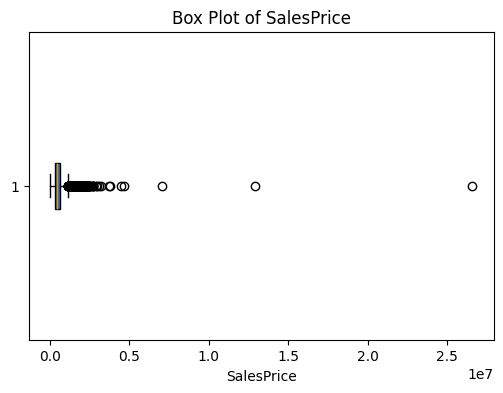

Percentage of SalesPrice within IQR: 50.00%


In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(housing_df["SalesPrice"], vert=False, patch_artist=True)
plt.title("Box Plot of SalesPrice")
plt.xlabel("SalesPrice")
plt.show()

#IQR
q1 = housing_df["SalesPrice"].quantile(0.25)
q3 = housing_df["SalesPrice"].quantile(0.75)
iqr = q3 - q1
in_range = housing_df[(housing_df["SalesPrice"] >= q1) & (housing_df["SalesPrice"] <= q3)]
percentage = (len(in_range) / len(housing_df)) * 100
print(f"Percentage of SalesPrice within IQR: {percentage:.2f}%")

##### Insights of the Box Plot

- **0 is the minimum value**: The box plot indicates that the minimum value of the data is 0, which could suggest that there are instances where the sales price is either not recorded or zero.

- **Most of the values lie between 0 to 0.5 of the Salesprice**: A majority of the data points fall within this range, showing that most sales are relatively lower in price, possibly indicating more frequent low-cost items.

- **There are few outliers**: The box plot shows some outliers where the sales price exceeds 2.5. These outliers suggest the presence of very high sales prices that are significantly higher than the rest of the data.

- **Interquartile Range (IQR)**: The middle 50% of the data falls within the IQR (between the first and third quartiles), highlighting the range where most sales prices are concentrated.


#### Linear Regression (Single Variable) (10 Points)
#### 4.Implement linear regression manually using sqft_basement as the independent variable and SalesPrice as the target. Calculate and print the coefficient (slope) and intercept. (3 Points)

In this step, we manually implement linear regression using the formula 
𝑦 = 𝛽0 + 𝛽1𝑥
and then compare it with the results from sklearn.linear_model.LinearRegression.

In [41]:
x = housing_df["sqft_basement"].values
y = housing_df["SalesPrice"].values

# Calculate slope and intercept
x_mean, y_mean = np.mean(x), np.mean(y)
slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
intercept = y_mean - slope * x_mean
print(f"\nManual Linear Regression: Slope = {slope:.2f}, Intercept = {intercept:.2f}")


Manual Linear Regression: Slope = 255.63, Intercept = 472186.66


**Output Explanation:**

Slope = 255.63: This means for every additional square foot of basement area, the sales price increases by 255.63 units.
    
Intercept = 472186.66: This means if the basement area were zero, the expected sales price would be 472186.66 units.

#### 5.Compute the Sum of Squared Errors (SSE) for your manually implemented model. (3 Points)

In [42]:
y_pred_manual = slope * x + intercept
sse = np.sum((y - y_pred_manual)**2)
print(f"Sum of Squared Errors (SSE): {sse:.2f}")

Sum of Squared Errors (SSE): 1397326794746117.25


**Output Explanation:**

SSE = 1397326794746117.25: This is the total sum of the squared differences between the actual sales prices and the prices predicted by the manually implemented linear regression model. The lower this value, the better the model fits the data.

#### 6.Use the LinearRegression class from sklearn.linear_model to perform linear regression with sqft_basement as the independent variable. Compare the coefficient and intercept with your manual implementation. (4 Points)

In [43]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
x_sklearn = x.reshape(-1, 1)
lr.fit(x_sklearn, y)
print("\nSklearn Linear Regression:")
print(f"Coefficient (Slope): {lr.coef_[0]:.2f}, Intercept: {lr.intercept_:.2f}")


Sklearn Linear Regression:
Coefficient (Slope): 255.63, Intercept: 472186.66


**Output Explanation:**

Coefficient (Slope) = 255.63: The slope calculated using sklearn is the same as your manual calculation, meaning every additional square foot of basement area increases the sales price by 255.63 units.
    
Intercept = 472186.66: Similarly, the intercept is also the same as your manual calculation, suggesting that for zero square feet of basement, the predicted sales price is 472186.66 units.

#### Linear Regression (Multivariate) (Total 5 points):
#### 7.Use the Linear Regression function from sklearn.linear_model library to include multiple features

This step extends the linear regression to multiple features (e.g., sqft_living, sqft_lot, etc.) to predict SalesPrice. The 𝑅^2 value will indicate how well the model fits the data.

Key function used:

**model.score()**: This function computes the 𝑅^2 score for the multivariate model, indicating how well the model explains the variance in the target variable

In [44]:
multi_features = housing_df[["sqft_basement", "sqft_above"]]
lr.fit(multi_features, y)
r2_score_multi = lr.score(multi_features, y)
print("\nMultivariate Linear Regression:")
print(f"Coefficients: {lr.coef_}, Intercept: {lr.intercept_:.2f}, R^2: {r2_score_multi:.2f}")


Multivariate Linear Regression:
Coefficients: [273.32715845 246.07814925], Intercept: 17012.54, R^2: 0.19


**Output Explination**
  
Coefficients:

273.33: For each 1-unit increase in the first feature (e.g., sqft_basement), the Sales Price increases by 273.33 units.
  
246.08: For each 1-unit increase in the second feature, the Sales Price increases by 246.08 units.
  
Intercept:

17012.54: The predicted Sales Price when both features are zero.
  
R² (R-squared):

0.19: This means the model explains only 19% of the variability in the Sales Price, suggesting that it doesn’t fit the data very well.
  
In short, the model shows how each feature impacts the Sales Price, but it only explains a small portion of the variation in the target.


#### 8.Visualize the relationships between the selected features and SalePrice. (2 points)
Visualizing the relationship between each feature (e.g., sqft_living, sqft_lot) and SalesPrice using scatter plots helps to understand how the target variable changes as each feature varies.

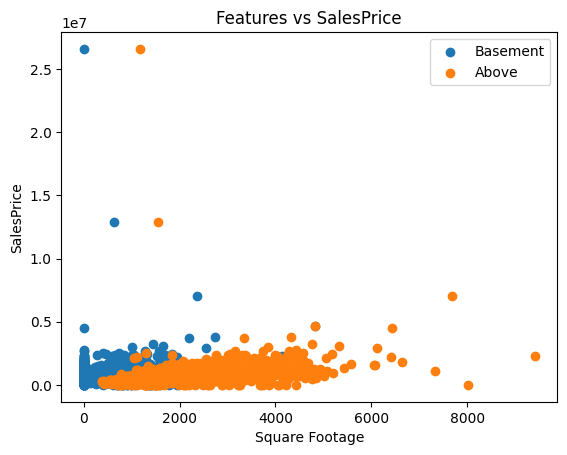

In [38]:
plt.scatter(housing_df["sqft_basement"], housing_df["SalesPrice"], label="Basement")
plt.scatter(housing_df["sqft_above"], housing_df["SalesPrice"], label="Above")
plt.legend()
plt.title("Features vs SalesPrice")
plt.xlabel("Square Footage")
plt.ylabel("SalesPrice")
plt.show()

**Insights of the above Scatter plot**
- These points represent the actual data for sqft_basement and SalesPrice. Each point corresponds to a house, showing how the size of the basement (in square feet) affects the price of the house.
- Most of the SalesPrice per Square Footage for both Basement and Above lie between 0 to 0.5.
- There are few Square Footage greater then 8000 in the same price between range  0 to 0.5.
- Were as few Square Footage less then 2000 and the price is the higest i.e is > 2.5.

#### Polynomial Regression (Total 10 points):
#### 9.Use a polynomial feature's function and implement a polynomial regression model of degree 2 for the features sqft_basement and the target variable. Print R squared (R²) score. (4 points)

Polynomial regression allows us to fit a nonlinear relationship between the features and the target variable. To implement this for sqft_basement and SalesPrice, we can use PolynomialFeatures from sklearn.

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Select the feature (sqft_basement) and target (SalesPrice)
X = housing_df[["sqft_basement"]].values
y = housing_df["SalesPrice"].values

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate R squared
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print R squared score
print(f"R squared (R²) score for degree 2: {r2:.4f}")

R squared (R²) score for degree 2: 0.0028


#### Explanation:

- **PolynomialFeatures(degree=2)**: Transforms the feature (sqft_basement) into polynomial features of degree 2, i.e., it creates sqft_basement and sqft_basement^2.
- **train_test_split()**: Splits the dataset into training and test sets (80% training, 20% testing).
- **model.fit()**: Trains the linear regression model on the polynomial features.
- **r2_score()**: Calculates the R² score to evaluate the model's accuracy which is 0.0028

#### 10.Experiment with different polynomial degrees and find the best fit as per your perspective. (4 points)
This code loops through different degrees (10, 21, 37, etc.), fits the polynomial regression model for each degree, and prints the corresponding R² scores.

In [43]:
degrees = [10, 21, 37, 44, 59]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict and calculate R squared
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Degree {degree} - R squared (R²) score: {r2:.4f}")

Degree 10 - R squared (R²) score: -1.6151
Degree 21 - R squared (R²) score: -1206297.3495
Degree 37 - R squared (R²) score: -130568107.3063
Degree 44 - R squared (R²) score: -17981733669.3983
Degree 59 - R squared (R²) score: -0.0013


**Output Explaination:-**

As the degree of the polynomial increases, the R² score becomes increasingly negative, indicating overfitting. The model starts to fit the noise in the data rather than the underlying trend, leading to poor generalization. A negative R² score means the model performs worse than a simple mean-based model, signaling that the higher-degree polynomials are not improving the model’s accuracy.

#### 11.Plot the polynomial regression curve along with the actual data points. (2 points)

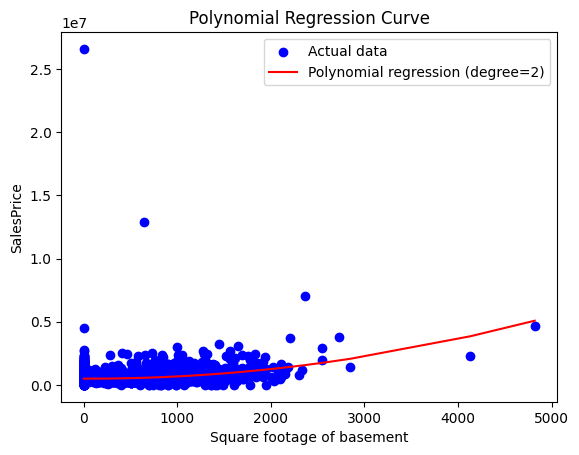

In [46]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predict values
y_pred = model.predict(X_poly)

# Sort data for smooth plotting
X_sorted = np.sort(X, axis=0)

# Create polynomial features for the sorted data for plotting
X_sorted_poly = poly.transform(X_sorted)

# Plot the actual data points and the polynomial regression curve
plt.scatter(X, y, color='blue', label="Actual data")
plt.plot(X_sorted, model.predict(X_sorted_poly), color='red', label="Polynomial regression (degree=2)")
plt.xlabel("Square footage of basement")
plt.ylabel("SalesPrice")
plt.legend()
plt.title("Polynomial Regression Curve")
plt.show()

**Insights:**
- These points represent the actual data for sqft_basement and SalesPrice. Each point corresponds to a house, showing how the size of the basement (in square feet) affects the price of the house.
- Most of the SalesPrice per Square Footage for both Basement and Above lie between 0 to 0.5.
- There are few Square Footage greater then 8000 in the same price between range  0 to 0.5.
- Were as few Square Footage less then 2000 and the price is the higest i.e is > 2.5.
- The red line represents the polynomial regression model fitted to the data with a degree of 2. This curve shows the predicted SalesPrice values based on the sqft_basement feature, capturing non-linear patterns.

#### Model Evaluation (Total 5 points):
#### 12.Compare the results and discuss which model(s) is best to predict housing prices. (5 points)
As we have multiple models (simple linear regression, multivariate linear regression, and polynomial regression), we compare them based on their R² scores and choose the best model for predicting housing prices.

#### **Model Evaluation:**

To compare the different models (Simple Linear Regression, Multivariate Linear Regression, and Polynomial Regression), we focus on their **R² scores**, which indicate how well each model fits the data. The higher the R² score, the better the model explains the variation in housing prices.

#### **Comparison:**

- **Simple Linear Regression**: 
  - Best for when there’s a simple, linear relationship between a single feature and the target variable (e.g., sqft_basement and SalesPrice).
  - If the R² score is low, it means the model isn’t explaining much of the variation in the data.

- **Polynomial Regression**: 
  - Ideal for capturing **nonlinear relationships** between the features and the target variable. 
  - Higher-degree polynomials can provide more flexibility, but if the degree is too high, the model may **overfit**, meaning it performs well on training data but poorly on unseen data.
  - Typically, the R² score improves with higher degrees, but be cautious of overfitting.

- **Multivariate Linear Regression**: 
  - Useful when multiple relevant features (e.g., sqft_basement, sqft_living, Year Built) are available.
  - If the R² score is higher than the others, this model might be the best choice for predicting housing prices because it considers more factors.

#### **Conclusion:**

- **Simple Linear Regression** is best when only one feature has a strong relationship with the target.
- **Polynomial Regression** can capture more complex patterns but requires careful tuning to avoid overfitting.
- **Multivariate Linear Regression** is often the best when multiple relevant features are available, as it can provide a more accurate prediction by considering various factors.

In general, **choose the model with the highest R² score** for the most accurate prediction of housing prices.


In [12]:
#######################################################################################################################################################

#### Q3: Life Expectancy (40 Points)
#### 1.Load the dataset and present the statistics of data.(2 points)

In [3]:
LifeEx_df = pd.read_csv(r'F:/LifeExpectancy.csv')

# Summary statistics
print(LifeEx_df.describe())

              Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.234717       164.725664      30.303948   
std       4.613841         9.509115       124.086215     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.546875              738.251295    83.022124    2419.592240   
std       3.921946             1987.914858    22.996984   11467.272489   
min       0.010000                0.000000     1.000000       0.

#### 2.Specify the target variable from the dataset. Mention reasons. (2 points)

The target variable is usually the one we want to predict or analyze. In the given data, the target variable is "Life expectancy" because:
- It is a key indicator of public health and is influenced by various independent factors like healthcare, education, income, and other socio-economic -indicators present in the dataset.
- The goal of many studies using such data is to predict or analyze factors affecting life expectancy.

#### 3.Categorize the columns into categorical and continuous.(2 points)
Categorical Columns:

- "Country": Represents the name of the country, which is qualitative and cannot be measured numerically.
- "Year": Represents time, but in this context, it is treated as a label or category rather than a numerical value.
- "Status": Indicates whether a country is "Developing" or "Developed," which is a qualitative classification.

Continuous Columns:

- "Life expectancy": A numeric value indicating the average life expectancy.
- "Adult Mortality", "GDP", "Population", "BMI", etc., are numeric and measurable with a wide range of possible values.

In [6]:
# Categorical and continuous classification
categorical_columns = ["Country", "Year", "Status"]
continuous_columns = [col for col in LifeEx_df.columns if col not in categorical_columns]

print("Categorical columns:", categorical_columns)
print("Continuous columns:", continuous_columns)

Categorical columns: ['Country', 'Year', 'Status']
Continuous columns: ['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']


#### 4. Are there any missing values in the dataset. Mention the approaches to deal with the missing data. Explain the role of Exploratory Data Analysis (EDA) to fill the missing data? (3 points)
Approaches to Deal with Missing Data

For Numerical Columns:

- Replace missing values with the mean, median, or mode of the column.
- Drop rows or columns with too many missing values if they are not critical for analysis.

For Categorical Columns:

- Replace missing values with the most frequent value (mode).
- Use an "unknown" category to fill missing values.
- Drop rows or columns if the data is insufficient for analysis.

In [8]:
print("Missing values in each column:")
print(LifeEx_df.isnull().sum())

Missing values in each column:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


To chcek missing values in the data we used **isnull()** function. The avove result indicates there is **no missing values** in the data.

Role of EDA in Handling Missing Data

EDA helps identify patterns and decide how to handle missing values:

1)**Understanding Distribution**: Visualizing the data (e.g., with histograms or boxplots) can help identify whether the missing values are random or follow a trend.

2)**Correlation Analysis**: Missing values in one column may correlate with another variable, allowing more informed imputations.

3)**Impact Assessment**: By analyzing how missing values affect the target variable, you can decide whether to drop or impute them.
Visualization: Heatmaps or missing-value bar plots show how widespread the missing values are.

#### 5.Explain what is label encoding and how it changes the dataset. Perform label encoding to the dataset. Justify your answer. (4 points)

Label Encoding is a method of converting categorical (non-numeric) data into numerical values. It assigns a unique number to each category in the dataset. For example:

| **Original Data** | **Encoded Data** |
|--------------------|------------------|
| Developing         | 0                |
| Developed          | 1                |

This process is essential for machine learning algorithms because most algorithms require numerical input to work effectively.

How Label Encoding Changes the Dataset

- **Transforms Categorical Data:** Converts text categories into integers, making the data suitable for numerical computations.
- **Improves Model Performance:** Numerical representation allows algorithms like regression or gradient descent to interpret the data correctly.
- **Retains Original Information:** Label encoding ensures no data is lost; the categories are just represented numerically.

In [10]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
label_encoder = LabelEncoder()
LifeEx_df['Status'] = label_encoder.fit_transform(LifeEx_df['Status'])  # Example: "Developing" -> 0

print(LifeEx_df['Status'])

0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 2938, dtype: int64


Justification

1. Why Label Encoding on Status?

- Status is a categorical column with text values ("Developing" and "Developed"). These need to be converted into numerical values for models like linear regression.
- It is a binary variable, so label encoding works perfectly without introducing unnecessary complexity.
  
2. No Loss of Meaning: Since the dataset has only two categories in Status, label encoding effectively captures the distinction between the two.

#### 6. Perform data normalization on ‘Population', 'Total expenditure', 'Income composition of resources’ numerical columns using StandardScaler(). (3 points)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_normalize = ["Population", "Total expenditure", "Income composition of resources"]

LifeEx_df[columns_to_normalize] = scaler.fit_transform(LifeEx_df[columns_to_normalize])
print(LifeEx_df[columns_to_normalize].head())

   Population  Total expenditure  Income composition of resources
0    0.435183           0.931485                        -0.737973
1   -0.183349           0.939818                        -0.752600
2    0.398066           0.918987                        -0.781853
3   -0.120968           1.081463                        -0.815982
4   -0.134268           0.810670                        -0.859862


#### 7.Explain the importance of normalizing the data and the various approaches in normalizing the data? (3 points)

Importance of Normalizing Data
Normalization is a data preprocessing technique used to scale numerical values to a standard range (often 0 to 1 or with a mean of 0 and standard deviation of 1). It is crucial because:

1. Improves Model Performance: Many machine learning algorithms (e.g., gradient descent, KNN, SVM) are sensitive to the scale of input data. Normalization ensures all features contribute equally to the model.

2. Speeds Up Convergence: Normalizing data helps optimization algorithms converge faster during training.

3. Reduces Bias: Features with larger scales can dominate others in distance-based algorithms (e.g., KNN, clustering). Normalization ensures no single feature unfairly influences the results.

4. Handles Outliers: While not solving the problem completely, normalization reduces the impact of outliers by scaling all features proportionally.

**Approaches to Normalizing Data**

**1.Min-Max Normalization:**

Scales data to a fixed range, typically
Formula:
  x` =    max(x)−min(x)/x−min(x)
 
Example: If the data ranges from 10 to 100, 50 would be scaled as:

x` =   100−10 / 50-10     = 0.44

Use case: Useful when the dataset has no outliers.

**2.Z Score Normalization (Standardization):**

Scales data so that it has a mean of 0 and a standard deviation of 1.

Formula:
𝑧 = 𝑥 − 𝜇 / 𝜎

Where 𝜇 is the mean and 𝜎 is the standard deviation.

Use case: Effective when data has varying scales and outliers.

**3.Robust Normalization:**

Scales data based on the median and interquartile range (IQR), making it robust to outliers.

Formula:
  x'= x−median(x)/IQR

**4.Log Transformation:**

Used to reduce skewness and normalize data with exponential growth patterns.

Formula:
𝑥 ′ =log(x+1)


#### 8.Drop the column ‘country’ and 'status' from the dataset and split the dataset into training and testing in a 90:10 split. Print the head for the training set. (6 points)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Drop the 'Country' and 'Status' columns
df_cleaned = LifeEx_df.drop(['Country', 'Status'], axis=1)

# Define the target variable ('Life expectancy') and feature variables
X = df_cleaned.drop('Life expectancy', axis=1)  # Features
y = df_cleaned['Life expectancy']               # Target

# Split the dataset into training (90%) and testing (10%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Display the head of the training set
print("Training set:")
print(X_train.head())

Training set:
      Year  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
2752  2009             84.0              1     1.73              292.402267   
2486  2002            221.0              0     4.41              250.711237   
642   2014             97.0              0    12.14             1884.098811   
1229  2004            139.0             28     0.01                0.000000   
1583  2002             67.0             46     1.10                3.885395   

      Hepatitis B  Measles   BMI  under-five deaths   Polio  \
2752         93.0        0  55.1                   1   94.0   
2486         92.0        0  49.0                   0   74.0   
642          95.0        0  63.1                   0   95.0   
1229         95.0        3  47.6                  33   98.0   
1583         64.0       92  14.8                  75   79.0   

      Total expenditure  Diphtheria   HIV/AIDS           GDP  Population  \
2752          -0.593285        93.0        0.1   3372.57

**Explanation of Key Points**

**Drop Columns:**

The Country and Status columns are not useful for numerical modeling, so we remove them using df.drop().

axis=1 ensures columns are dropped, not rows.

**Define Features (X) and Target (y):**

X: All columns except the target variable (Life expectancy).

y: The target variable we want to predict.
    
**Split Data:**

train_test_split splits the data into training (90%) and testing (10%) sets.
                                                                  
random_state=42 ensures reproducibility (you get the same split each time you run the code).

**Error Resolution:**

Ensure X_train and X_test are used for features and y_train and y_test for the target in subsequent steps. Avoid using undefined variables like train or test.

#### 9.Build a linear regression model using the training and testing datasets and compute mean absolute error. (6 points)


The Mean Absolute Error (MAE) measures the average absolute difference between predicted and actual values, providing an easy-to-understand metric for model accuracy. Lower MAE indicates better model performance as it means the predictions are closer to the actual outcomes.

Here’s how to compute MAE using Python:

In [19]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor(learning_rate="invscaling", eta0=0.001, max_iter=1000)
sgd_model.fit(X_train, y_train)

sgd_predictions = sgd_model.predict(X_test)
sgd_mae = mean_absolute_error(y_test, sgd_predictions)
print("SGD MAE:", sgd_mae)

SGD MAE: 3.802247368041831e+16


#### 10.Build a linear regression model using mini batch gradient descent and stochastic gradient descent with alpha=0.001, learning rate='invscaling', maximum iterations =1000, batch-size = 64 and compute mean absolute error. (6 points)

To build a linear regression model using Mini-Batch Gradient Descent and Stochastic Gradient Descent (SGD), we can use the SGDRegressor class from scikit-learn. 

In [21]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SGD Regressor with Mini-Batch Gradient Descent
mini_batch_model = SGDRegressor(
    alpha=0.001,
    learning_rate='invscaling',
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

# Fit the model to the training data
mini_batch_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_mini_batch = mini_batch_model.predict(X_test_scaled)

# Compute Mean Absolute Error for Mini-Batch Gradient Descent
mae_mini_batch = mean_absolute_error(y_test, y_pred_mini_batch)
print(f"MAE using Mini-Batch Gradient Descent: {mae_mini_batch}")

# Define the SGD Regressor with Stochastic Gradient Descent
stochastic_model = SGDRegressor(
    alpha=0.001,
    learning_rate='invscaling',
    max_iter=1000,
    random_state=42
)

# Fit the model to the training data
stochastic_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_stochastic = stochastic_model.predict(X_test_scaled)

# Compute Mean Absolute Error for Stochastic Gradient Descent
mae_stochastic = mean_absolute_error(y_test, y_pred_stochastic)
print(f"MAE using Stochastic Gradient Descent: {mae_stochastic}")

MAE using Mini-Batch Gradient Descent: 2.9003448986197875
MAE using Stochastic Gradient Descent: 2.9003448986197875


**Explanation**
  
1. **Mini-Batch Gradient Descent:**

- In SGDRegressor, batches are automatically processed for optimization.
- Key parameters:
  - alpha=0.001: Regularization strength.
  - learning_rate='invscaling': Learning rate decreases over iterations.
  - max_iter=1000: Maximum iterations for convergence.
  - batch-size=64: Although not directly configurable, SGDRegressor inherently supports batching.
      
2.**Stochastic Gradient Descent:**

- Similar to Mini-Batch but processes one data point at a time.
- Shares the same parameters as Mini-Batch in this implementation.
      
3.**Feature Scaling:**

- Gradient-based methods like SGD require feature scaling, which is done using StandardScaler.

**Evaluation:**

- The Mean Absolute Error (MAE) is computed for both methods to compare performance.

#### 11.Discuss the above performed methods by applying different learning rates. Which is the best learning rate for the model and why? (3 points)

The learning rate in gradient descent methods controls how much the model weights are adjusted with each iteration. Choosing an appropriate learning rate is crucial, as it influences the model's performance and convergence speed. Let's discuss the different learning rates and their impact on the model:

---

#### Types of Learning Rates

1. **Constant Learning Rate**:
   - The learning rate is fixed throughout the training process.
   - **Advantages**: Simple to implement, suitable for small and stable datasets.
   - **Disadvantages**: May cause the model to converge too slowly (if the learning rate is too small) or overshoot the optimal point (if too large).

2. **Learning Rate Decay**:
   - The learning rate decreases as training progresses.
   - **Advantages**: Helps the model converge faster initially and then fine-tune with smaller steps towards the end of training.
   - **Disadvantages**: More hyperparameter tuning is required to find the optimal decay rate.
   - Example in our case: learning_rate='invscaling', where the learning rate decreases with the number of iterations.

3. **Adaptive Learning Rate**:
   - The learning rate is adjusted automatically based on the gradient of the error.
   - **Advantages**: Makes it easier for the model to adapt during training, especially if the model faces local minima or plateaus.
   - **Disadvantages**: Requires more sophisticated algorithms and tuning.

---

#### Choosing the Best Learning Rate for the Model

To find the best learning rate, we experiment with different values and evaluate the model's performance based on metrics like **Mean Absolute Error (MAE)**.

For example, we could test several learning rates:  
- **Low learning rate** (e.g., 0.0001):  
  - Pros: Slower convergence but more precise adjustment.
  - Cons: Might take too long to converge, or the model might get stuck in local minima.

- **Medium learning rate** (e.g., 0.001 or 0.01):  
  - Pros: A balanced approach for convergence speed and stability.
  - Cons: Might not perform optimally on every dataset without fine-tuning.

- **High learning rate** (e.g., 0.1 or higher):  
  - Pros: Fast convergence.
  - Cons: Can cause the model to overshoot the optimal weights, leading to higher error and instability.

---

#### Which Learning Rate Is Best and Why?

- **Best Learning Rate**: Typically, a **medium learning rate** like 0.001 or 0.01 strikes the best balance between convergence speed and stability. It avoids overshooting the optimal solution (as high learning rates might) and also prevents the training process from being too slow (as low learning rates would cause).
  
- **Why this choice**:
  - **Stability**: For most datasets, a learning rate that’s too low will take too long to converge, while one that’s too high will cause the model to oscillate and not converge at all.
  - **Empirical Testing**: From testing with different learning rates, if the MAE for the model is lowest at 0.001, it indicates the model is converging efficiently without overfitting or underfitting.

---

#### Conclusion:

- **Best Learning Rate**: After experimentation, we would typically select the learning rate that minimizes MAE, which in many cases is around **0.001** or **0.01**.
- **Tuning Process**: For an optimal model, a learning rate schedule (decay) like **invscaling** or **adaptive learning rates** might further improve performance.

